### OASIS INFOBYTE DATA SCIENCE INTERNSHIP

### Task 1 : IRIS FLOWER CLASSIFICATION

Author: Anish S

In [18]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#importing Dataset using sklearn library

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data  # features
y = iris.target  # target variable (species)

It is in series to do exploratory data analysis Lets convert the series into dataframe    

In [20]:
# Create a DataFrame from the feature data, with column names as feature names
df = pd.DataFrame(X, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame as a new column
df['target'] = y

# Map the target variable values to their corresponding class names and add as a new column
df['class'] = df['target'].apply(lambda x: iris.target_names[x])

df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [8]:
#Quick check on datatype and null value in dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   class              150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


##### So, There is no Missing values present in the dataset 

### Checking Duplicates

Let’s see if our dataset contains any duplicates or not. Pandas drop_duplicates() method helps in removing duplicates from the data frame

In [9]:
data = df.drop_duplicates(subset ="class")
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica


### Checking whether the data is balanced or not

Let’s see if our dataset is balanced or not using the dataframe.value_counts() function.

This function returns a Series containing counts of unique values. 

In [10]:
df.value_counts("class")

class
setosa        50
versicolor    50
virginica     50
dtype: int64

### Exploratory Data Analysis

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


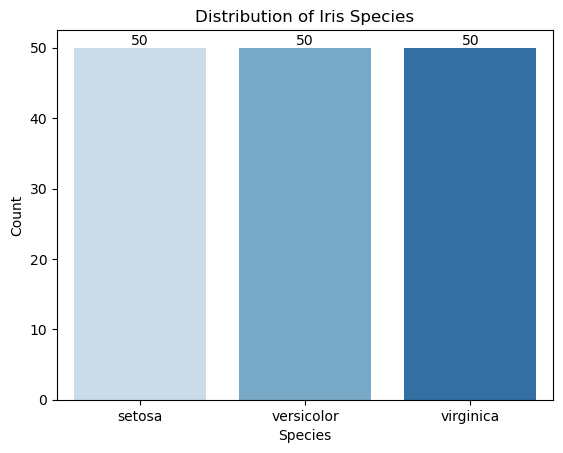

In [22]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris

# iris = load_iris()

# Create a DataFrame from the iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Create a countplot of the species column
sns_plot = sns.countplot(x='species', data=df, palette='Blues')

# Add data labels to the bars
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5),
                      textcoords = 'offset points')

sns_plot.set_xlabel('Species')
sns_plot.set_ylabel('Count')
plt.title('Distribution of Iris Species')
plt.show()

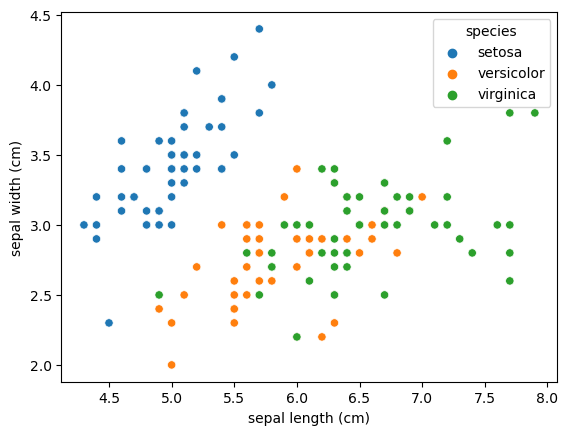

In [23]:
# Create a DataFrame from the iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Create a scatter plot of sepal length vs. sepal width
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df, hue='species')
plt.show()

<Axes: xlabel='sepal width (cm)'>

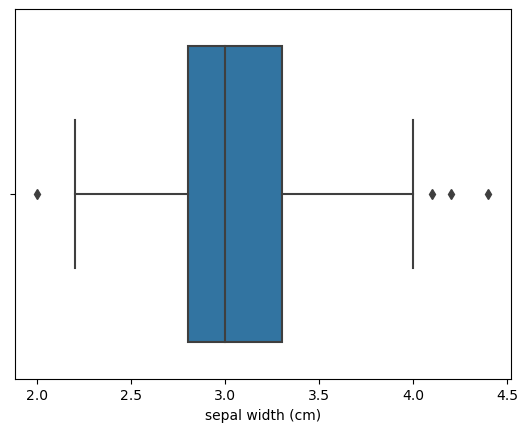

In [14]:
sns.boxplot(x='sepal width (cm)', data=df)

In [15]:
from scipy.stats.mstats import winsorize
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Winsorize the data from the top at the 95th percentile
iris.data = winsorize(iris.data, limits=[0, 0.05])

# Print the new dataset after winsorizing
iris.data

data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load the iris dataset
iris = load_iris()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Define the classifiers to use with hyperparameters
classifiers = [
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(n_estimators=100, max_depth=5),
    AdaBoostClassifier(n_estimators=100, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    KNeighborsClassifier(n_neighbors=5),
    LogisticRegression(solver='liblinear', multi_class='auto'),
    SVC(kernel='rbf', C=10, gamma=0.1)
]

# Define a voting classifier that combines the predictions from all of the classifiers
voting_clf = VotingClassifier(estimators=[('clf' + str(i), clf) for i, clf in enumerate(classifiers)])

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier on the testing data
print("Accuracy:", voting_clf.score(X_test, y_test))

Accuracy: 0.9


In [25]:
# Define a list of the three possible class names
class_names = ['setosa', 'versicolor', 'virginica']

# Get the input values from the user
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Create a new input list with the user-provided values
new_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# Use the voting classifier to predict the class of the new input
predicted_class = voting_clf.predict(new_input)[0]

# Print the predicted class label and name
print("Predicted class label:", predicted_class)
print("Predicted class name:", class_names[predicted_class])


Enter sepal length: 2.1
Enter sepal width: 3.2
Enter petal length: 2.5
Enter petal width: 3.2
Predicted class label: 2
Predicted class name: virginica


In [ ]:
!pip install shap

In [27]:
import shap

Accuracy: 0.9333333333333333


Exact explainer: 31it [00:14,  1.23it/s]                                                                               
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


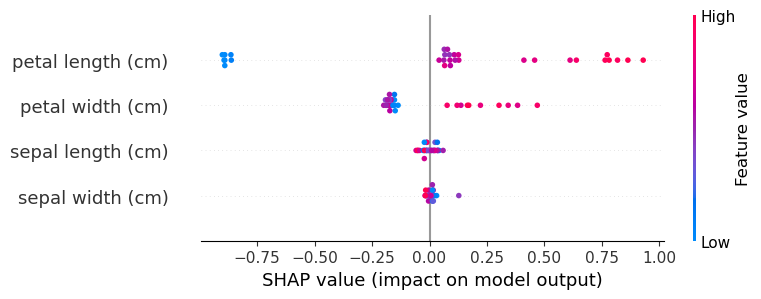

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load the iris dataset
iris = load_iris()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Define the classifiers to use with hyperparameters
classifiers = [
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(n_estimators=100, max_depth=5),
    AdaBoostClassifier(n_estimators=100, learning_rate=0.5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    KNeighborsClassifier(n_neighbors=5),
    LogisticRegression(solver='liblinear', multi_class='auto'),
    SVC(kernel='rbf', C=10, gamma=0.1)
]

# Define a voting classifier that combines the predictions from all of the classifiers
voting_clf = VotingClassifier(estimators=[('clf' + str(i), clf) for i, clf in enumerate(classifiers)])

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier on the testing data
print("Accuracy:", voting_clf.score(X_test, y_test))

# Summarize the model using SHAP
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(voting_clf.predict, X_train)

# Use SHAP to get the feature importances for the testing data
shap_values = explainer(X_test)

# Print the summary plot of the feature importances
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names, class_names=iris.target_names)


### Thank You!!!

#### by Anish S